# Unsupervised Learning Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We, **Team 9**, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.



### Predict Overview: EDSA Movie Recommendation 2022

The global movie industry is a multi-billion dollar industry. According to <a href="https://www.forbes.com/sites/bradadgate/2022/03/17/overview-of-the-entertainment-market-in-2021-coming-out-of-covid-19/?sh=2e3d5f94519c">Forbes</a>, a total revenue of 36.8 billion USD was made in the US entertainment (home and mobile) market in 2021. This market consist of digital and physical (discs), as well as the theatrical market, and the revenue accounted for a year-over-year increase of 14%, a figure that surpassed the record 36.1 billion USD in 2019.

When pay TV subscriptions were included the revenue for the entertainment market jumped to 133.5 billion USD, and this represents a slight drop-off from revenue in 2020 (133.7 billion USD). This is a clear indication that pay TV subscritions are the biggest revenue generating facet of the movie industry.

Globally, in 2021, the home, mobile and theatrical market totaled 99.7 billion USD in revenue, while when pay TV subscription was included, the entertainment market reached 328.2 billion USD in revenue. According to the 2021 report by The Motion Picture Association in the US, there were 135 streaming video providers in the U.S. offering movies and television shows to viewers, with Netlix being a major player.

Providers of streaming services heavily depend on movie recommendation algorithms. The Netflix Recommendation Engine is the most succesful of these algorithms. It’s so accurate that 80% of Netflix viewer activity is driven by personalised recommendations from the engine. It’s estimated that the Netflix recommendation Engine saves Netflix <a href="https://www.lighthouselabs.ca/en/blog/how-netflix-uses-data-to-optimize-their-product#:~:text=The%20Netflix%20Recommendation%20Engine&text=It's%20so%20accurate%20that%2080,is%20driven%20by%20personalised%20recommendations.">over 1 billion USD per year</a>.

Providers of streaming services are in a race to optimize the performance of their movie recommendation algorithm such that it performs as good or even better than the Netflix Recommendation Engine; therefore, develeping a good movie recommendation system come with enormous economic gains.  As a team, we intend to develope a recommendation algorithm based on content or collaborative filtering, that is capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences. This will enable our algorithm to recommend movies that users will most likely rate high and want to watch.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Comet</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, we import and briefly discuss the libraries that will be used throughout your analysis and modelling. |

---

In [28]:
from comet_ml import Experiment

import numpy as np
import pandas as pd
import string
# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from re import sub
from decimal import Decimal
import locale
#locale.setlocale(locale.LC_ALL, 'en_US.UTF8')
sns.set(font_scale=1.4)
sns.set_style("darkgrid")
%matplotlib inline


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, we load the data from the `CSV files` file into a DataFrame. |

---

In [3]:
df_movies = pd.read_csv('movies.csv')
df_imdb = pd.read_csv('imdb_data.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_genome_tags = pd.read_csv('genome_tags.csv')
train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we perform an in-depth analysis of all the variables in the DataFrame. |



Here we use various methods to take an in-depth look at our dataframe. These methods include:
<ul>
<li>isnull()</li>
<li>info()</li>
<li>shape</li>
<li>WordCloud()</li>

</ul>

### Detailed Dataset Overview

#### *Movie Dataframe Overview
#### *IMdb Dataframe Overview
#### *Genome Scores Dataframe Overview
#### *Genome Tags Dataframe Overview
#### *Tags Dataframe Overview
#### *Link Dataframe Overview
#### *Train Dataframe Overview



In [40]:
pd.set_option('display.max_colwidth', 600)
df_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


#### Movie dataframe information

In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [6]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

 Movie dataframe has :
 * Three  features 1) movieId ,2) title  and 3) genres
 * The dataframe has 62423 observations
 * The dataframe has no cell with missing data
 * The dataframe has a mamory usage of 1.4MB

In [8]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betrayal|mother son relationship
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [9]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [10]:
df_imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

IMdb dataframe has :
 * Six  features  namely  movieId, title_cast, director, runtime, budget and play_keywords
 * The dataframe has 27278 cells of observations 
 * The title_cast feature has 17210 observations and 10068 missing observations
 * The director feature has 17404 observations and  9874 missing observations
 * The runtime feature has 15189 observations and 12089 missing observations
 * The budget feature has 7906 observations and  19372 missing observations
 * The plot_keywords feature has 16200 observations and  11078 missing observations
 * The dataframe has a memory usage of 1.2MB

In [11]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [12]:
df_genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [13]:
df_genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

Genome Scores  dataframe has :
 * Three  features 1) movieId ,2) tagId  and 3) relevance
 * The dataframe has 15584448  observations
 * The dataframe has no cell with missing data
 * The dataframe has a mamory usage of 356.7MB

In [16]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [15]:
df_genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [14]:
df_genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

Genome Scores  dataframe has :
 * Three  features 1) tagId and 2) tag
 * The dataframe has 1128  observations
 * The dataframe has no cell with missing data
 * The dataframe has a mamory usage of 17.8KB

In [17]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [18]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [19]:
df_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Tags dataframe has :
 * Four  features 1) userId, 2) movieId , 3) tag and 4) timestamp 
 * The dataframe has  1093360  observations
 * The tag feature has 16 missing observations
 * The dataframe has a mamory usage of 33.4MB

In [20]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [21]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [22]:
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

Genome Scores  dataframe has :
 * Three  features 1) movieId , 2) imdbId and 3) tmbId
 * The dataframe has 62423 observations
 * The tmdbIdfeature has 107 messing observations
 * The dataframe has a mamory usage of 1.4MB

In [23]:
train.head() 

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [25]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Train  dataframe has :
 * Four  features 1) userIdId , 2) movieId , 3) rating and 4) timestamp
 * The dataframe has 10000038   observations
 * The dataframe has no cell with missing data
 * The dataframe has a mamory usage of 305.2MB

## Data Visualisation

### Popular  Movie Genre visuals

In [46]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(mov.movieId, d) for mov in movies_genres.itertuples() for d in mov.genres],
                             columns=['movieId', 'genres'])

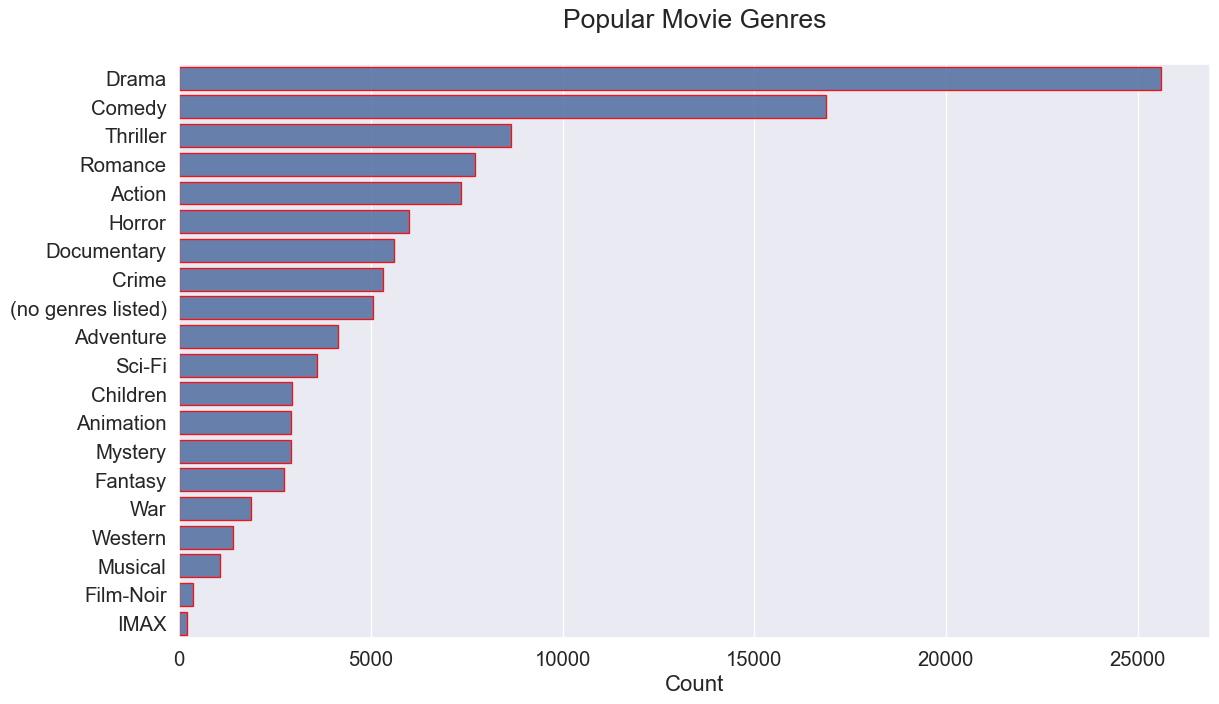

In [48]:
plot = plt.figure(figsize=(14, 8), dpi =95)
plt.title('Popular Movie Genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,order=movies_genres['genres']
              .value_counts(ascending=False).index, color='b', ec= 'red', alpha=0.9)
plt.ylabel('')
plt.xlabel('Count')
plt.show()

### Popular Actors  Plot

In [38]:
movies_actor = pd.DataFrame(df_imdb[['movieId', 'title_cast']],columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and create a list containing the title_cast allocated to each movie
movies_actor= movies_actor[movies_actor['title_cast'].notnull()]
movies_actor.title_cast = movies_actor.title_cast.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-tite_cast combination is in a seperate row
movies_actor = pd.DataFrame([(act.movieId, d) for act in movies_actor.itertuples() for d in act.title_cast],columns=['movieId','title_cast'])

movies_actor = movies_actor.groupby(['title_cast'])['movieId'].count().reset_index(name='Number of Movies')
movies_actor =movies_actor.sort_values(by='Number of Movies',ascending=False)

#Selecting the Top 20 actors in movies
movies_actor = movies_actor .head(20)
movies_actor =movies_actor.sort_values(by='Number of Movies',ascending=True)


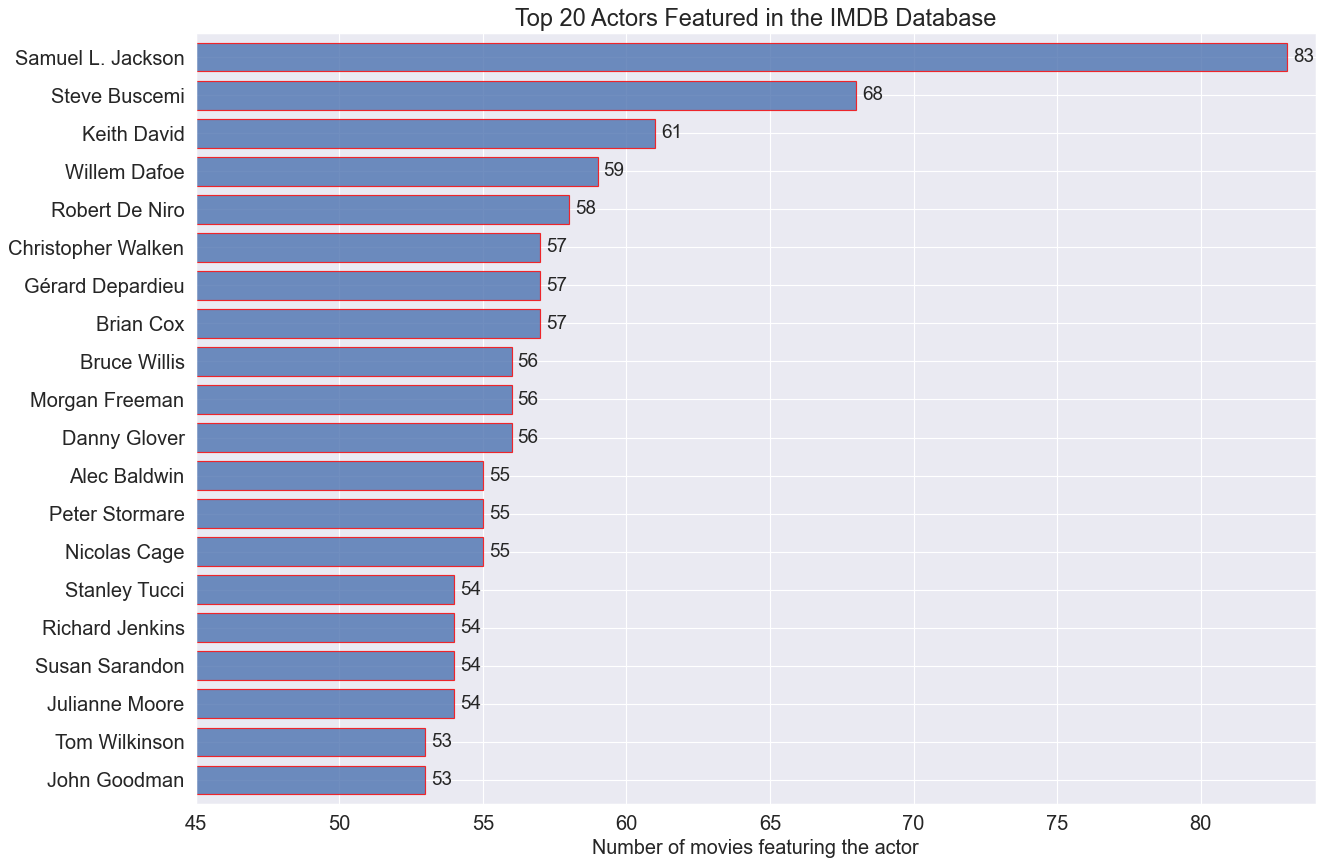

In [50]:
y_labels =movies_actor['title_cast']

# Plot the figure.
plt.figure(figsize=(17, 12),dpi =85)
ax = movies_actor['Number of Movies'].plot(kind='barh',color='b', fontsize=17,
                                           edgecolor='red', xlim=[45,84], width=.75, alpha=0.8)
ax.set_title('Top 20 Actors Featured in the IMDB Database', fontsize=20)
ax.set_xlabel('Number of movies featuring the actor')
ax.set_ylabel('')
ax.set_yticklabels(y_labels)
rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    
    label = "{}".format(x_value)
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),fontsize=16,
                 textcoords="offset points",va='center')            
    

### Popular Movie directors 

In [51]:
## grouping the movies by the director and counting the total number of movies per director
movies_director = pd.DataFrame(df_imdb[['movieId', 'director']],columns=['movieId', 'director'])

movies_director  = movies_director.groupby(['director'])['movieId'].count().reset_index(name="count")
movies_director =movies_director.sort_values(by='count',ascending=False)

movies_director = movies_director .head(20)
movies_director =movies_director.sort_values(by='count',ascending=True)

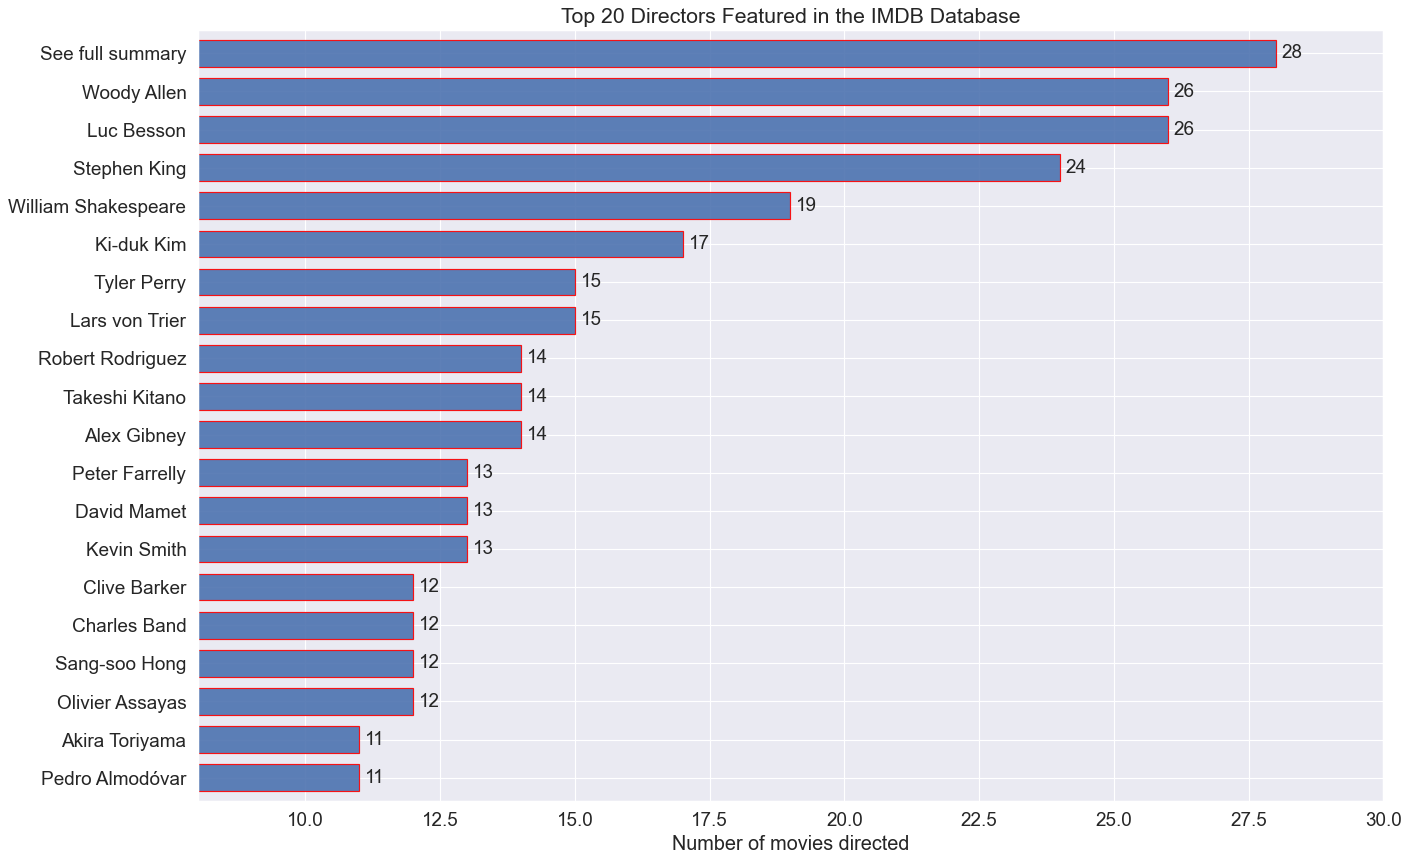

In [52]:
y_labels =movies_director['director']

# Plot the figure.
plt.figure(figsize=(18, 12), dpi =85)
ax = movies_director['count'].plot(kind='barh',color='b', edgecolor='red', 
                                   width=.7, fontsize=16, xlim=[8,30], alpha=0.9)
ax.set_title('Top 20 Directors Featured in the IMDB Database', fontsize=18)
ax.set_xlabel('Number of movies directed')
ax.set_ylabel('')
ax.set_yticklabels(y_labels)

rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{}".format(x_value)

    # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),textcoords="offset points"
                 ,va='center',ha=ha, fontsize=16)                                        


### Popular movies visual

In [53]:
movies_plot = pd.DataFrame(df_imdb[['movieId', 'plot_keywords']],
                             columns=['movieId', 'plot_keywords'])

# Split movies plot seperated by "|" and create a list containing the plot allocated to each movie
movies_plot= movies_plot[movies_plot['plot_keywords'].notnull()]
movies_plot.plot_keywords = movies_plot.plot_keywords.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-play_plot combination is in a seperate row
movies_plot = pd.DataFrame([(tup.movieId, d) for tup in movies_plot.itertuples() for d in tup.plot_keywords],columns=['movieId','plot_keywords'])

movies_plot = movies_plot.groupby(['plot_keywords'])['movieId'].count().reset_index(name="count")
movies_plot =movies_plot.sort_values(by='count',ascending=False)

movies_plot = movies_plot.head(20)
movies_plot =movies_plot.sort_values(by='count',ascending=True)

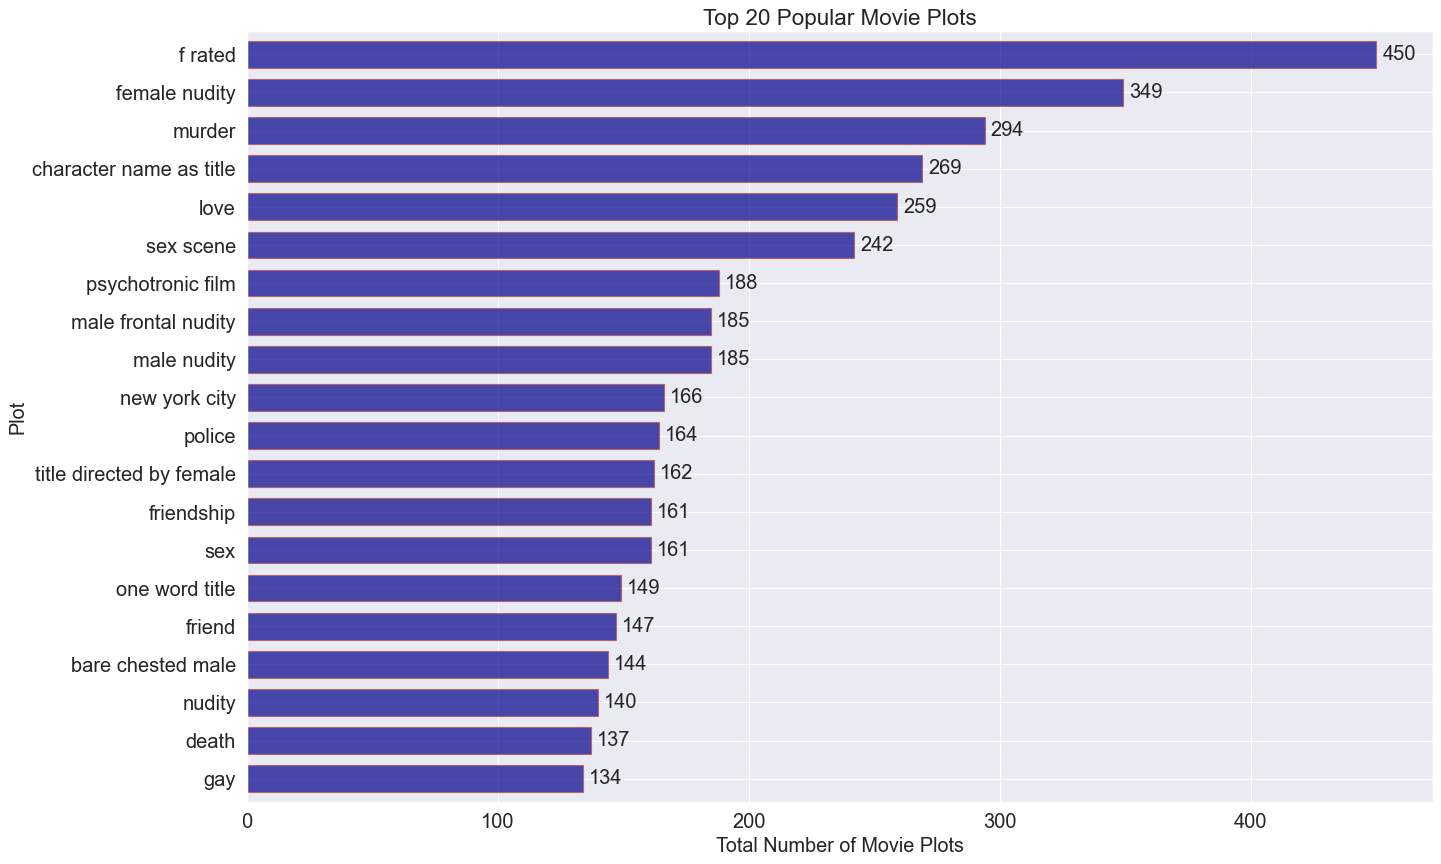

In [54]:
y_labels =movies_plot['plot_keywords']

# Plot the figure.
plt.figure(figsize=(18, 12), dpi=85)
ax = movies_plot ['count'].plot(kind='barh',color='darkblue', fontsize=17,
                                           edgecolor='r', width=.7, alpha=0.7)
ax.set_title('Top 20 Popular Movie Plots', fontsize=19)
ax.set_xlabel('Total Number of Movie Plots')
ax.set_ylabel('Plot')
ax.set_yticklabels(y_labels)

rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    if x_value < 0:
        
        space *= -1

        ha = 'right'

    
    label = "{}".format(x_value)
    
     # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),
                 textcoords="offset points",va='center',ha=ha, fontsize=17) 


### Number  of Movies Produced Annually

In [55]:
# Create dataframe containing only the movieId and genres
movies_year = pd.DataFrame(df_movies[['movieId', 'title']],columns=['movieId', 'title'])

movies_year= movies_year[movies_year['title'].notnull()]
# Split the year from title
movies_year.title = movies_year.title.apply(lambda x: x[-5:-1])

movies_year = movies_year.groupby(['title'])['movieId'].count().reset_index(name="count")
movies_year =movies_year[movies_year['count'] > 500]
movies_year =movies_year.sort_values(by='count',ascending=True)


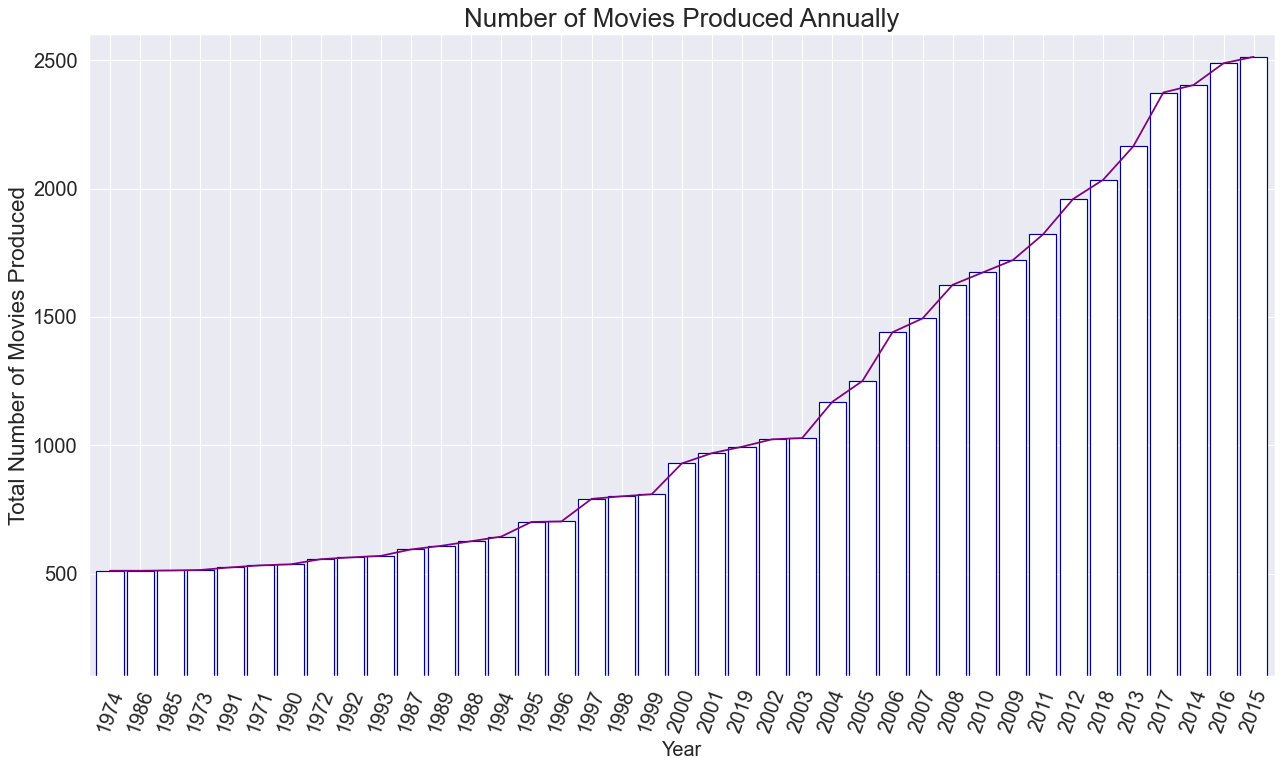

In [56]:
y_labels =movies_year['count']

# Plot the figure.
fig,ax = plt.subplots(figsize=(18, 10), dpi = 85)

movies_year[['count', 'title']].plot(x='title',kind='bar', color='white', fontsize=17, ylim=[100, 2600],
                                           width=.9, ax=ax, legend=False, edgecolor='darkblue')
                                     
movies_year.plot(x='title', kind = 'line', ax=ax, color='purple', legend=False)
                                     
ax.set_title('Number of Movies Produced Annually', fontsize=22)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Movies Produced', fontsize=19)
                                     
plt.xticks(rotation=70)
plt.show()

### Movie tags

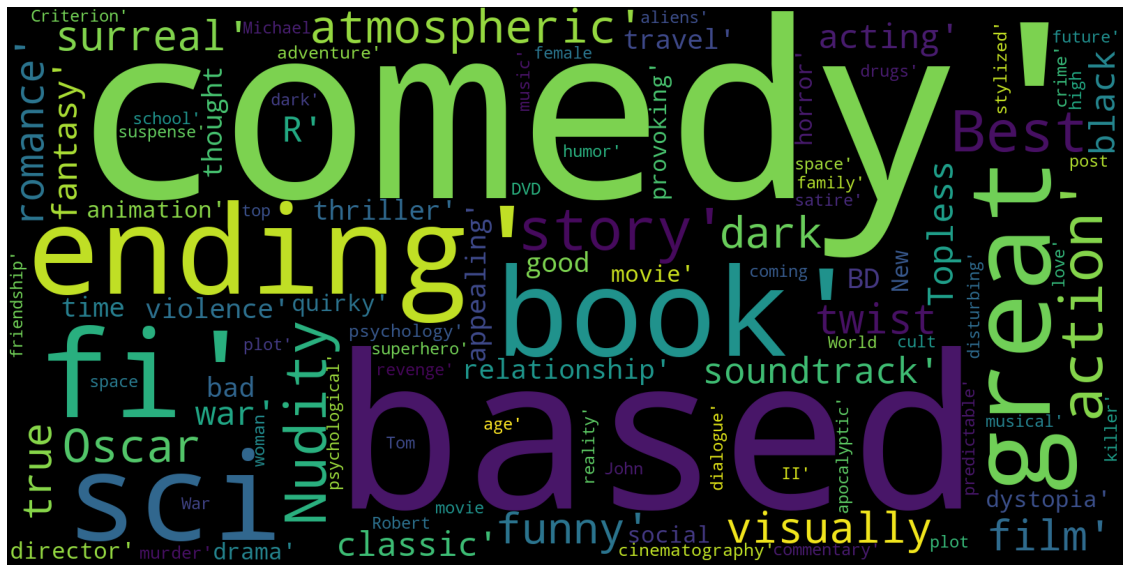

In [57]:
tags_2 =str(list(df_tags['tag']))
plt.figure(figsize = (20,20))
wc = WordCloud(background_color = "black", max_words = 100 , width = 1600 , height = 800,
               collocations=False).generate(tags_2)
plt.axis("off")
plt.imshow(wc)

### Merging Movies and IMdb Dataframe

In [58]:
merged_inner = pd.merge(left=df_movies, right=df_imdb, left_on='movieId', right_on='movieId')
merged_inner.head(2)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game


### Annual Budget for Movies

In [59]:
movies_view=df_imdb.sort_values(by='budget',ascending=False)
print(movies_view.budget.unique())

['ZAR10,000,000' 'VEB4,273,248' 'UAH10,000' ... '$1,000' '$0' nan]


There are different currencies featured in the budget section.Therefore, we will be making use of the US dollars \\$ ,because most movies are in \\$ 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section, we clean the dataset and possibly create new features - as identified in the EDA phase. |

---

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

---

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section, we compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

<a id="eight"></a>
## 8. Comet
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we customize and combine our data, code, visualizations, reports, and much more. |

---

# First import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="uSjPrOwXQdE1GLSEQuhuEJ1QQ",
    project_name="unsupervised-recommender-system",
    workspace="stanfordgibson",
)